# Feature ellimination to reduce the tests required for ultrasonic machine testing
## By Dinesh Sonawane

### AIM - Currently tests are performed on ultrasonic machine resulting in 577 features to judge the equipment performance. Aim is to reduce the test (in turn features) to minimum possible without impacting the performance of the equipment.

In [1]:
# Import the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
os.getcwd()

'C:\\Users\\HP\\OneDrive\\Desktop\\LearnBay\\4. Machine Learning\\6. Practice_Ultrasound_Project'

In [2]:
# Reading the dataset
data = pd.read_csv('Ultrasound_1.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,...,NaN,0.5025,0.0128,0.0040,2.5391,0.0199,0.0117,0.0043,58.5665,1
1,3052.82,2525.33,2186.2667,1088.7359,1.2723,100.0,103.5633,0.1216,1.4891,-0.0007,...,131.2543,0.5003,0.0150,0.0043,2.9976,0.0228,0.0299,0.0105,131.2543,-1
2,2914.47,2492.14,2181.6111,1083.3937,1.2484,100.0,104.1478,0.1219,1.5568,-0.0214,...,NaN,0.4939,0.0136,0.0037,2.7633,0.0228,0.0299,0.0105,131.2543,-1
3,2959.86,2491.19,2208.0000,1835.9832,1.5714,100.0,100.2478,0.1239,1.4680,0.0033,...,128.2819,0.4993,0.0138,0.0038,2.7630,0.0140,0.0180,0.0054,128.2819,1
4,2964.77,2524.44,2181.5111,1177.0830,1.3012,100.0,100.9333,0.1216,1.4047,-0.0080,...,NaN,0.4984,0.0155,0.0040,3.1012,0.0140,0.0180,0.0054,128.2819,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Columns: 577 entries, 0 to Pass/Fail
dtypes: float64(576), int64(1)
memory usage: 6.9 MB


In [4]:
pd.set_option("display.max_columns",600)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.9720,187.5112,12.4690,1.3993,-6362.50,3051.25,-3718.50,1500.25,0.9955,1.9012,5.2713,65.8000,3.1444,0.2229,4.7036,85.4579,8.6667,50.2987,64.2122,49.7013,66.0973,86.9255,117.9550,14.55,4.866,70.0,358.9764,10.1073,124.9991,721.5050,1.3362,147.7673,631.7427,214.7661,4.544,4.782,2910.0,0.9330,0.9502,4.7451,26.7745,357.1600,10.3983,111.7736,10.5591,13.2255,20.1161,701.3889,1.0994,152.2500,621.1836,72.1031,NaN,NaN,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,NaN,2.4152,0.9907,1832.1146,0.2036,8549.8000,-0.0928,0.0023,-0.0004,-0.0001,0.0003,-0.0255,0.0233,-0.0223,0.0000,0.0000,0.0010,-0.0060,0.0003,-0.0022,0.0004,-0.1042,-0.0873,NaN,NaN,NaN,0.4550,0.9471,0.0,738.6785,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,15.85,15.80,0.9176,2.761,0.6274,3.565,0.6623,0.6956,0.9965,2.3403,1012.1967,36.5767,136.0,123.9,151.3,64.0999,480.9570,0.1297,0.0,4.58,0.0043,0.0525,0.0800,0.0626,0.0203,4.0267,12.328,6.774,0.8158,0.0123,3.6348,0.45,0.0359,NaN,NaN,145.0,562.0,788.0,157.0,0.124,0.080,0.123,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.2885,0.8603,0.1965,0.219,0.0,0.0,14.82,0.404,7.08,16.977,0.1392,6.32,0.0,9.41,40.839,0.231,9.01,16.55,0.284,3.88,13.62,9.01,12.878,24.0891,0.4502,8.78,13.62,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,NaN,0.0353,0.0006,63.5398,0.0670,1460.8999,0.0,0.0308,0.0193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0041,0.0042,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.1085,0.0203,0.0,147.5352,0.0012,2.9093,0.0273,0.0043,0.3552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0699,8.140,2.3331,34.4617,48.7921,48.2584,22.5106,149.6750,0.0405,0.0,1.4215,0.0009,0.0184,0.0200,0.01

In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1572.000000,1570.000000,1563.000000,1563.000000,1563.000000,1563.0,1563.000000,1568.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1567.00000,1577.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1553.000000,1553.000000,1576.0,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1570.000000,1571.000000,1571.000000,1571.000000,1570.000000,1570.000000,1570.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,788.000000,788.000000,1553.000000,1553.000000,1553.000000,1553.000000,1553.000000,1553.000000,1553.000000,1553.000000,1576.000000,1565.000000,226.000000,1577.000000,1577.000000,1577.000000,1526.000000,1526.000000,1571.000000,1575.000000,1575.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1575.000000,1575.000000,1571.000000,1571.000000,1571.000000,1571.000000,549.000000,549.000000,549.000000,861.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1553.000000,1577.000000,1577.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1569.000000,1569.000000,1569.000000,1572.000000,1571.000000,1570.000000,1563.000000,1563.000000,1563.000000,1563.0,1563.000000,1568.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1567.000000,1577.000000,138.00

In [7]:
# Finding the missing values
data.isnull().sum().sum()

42093

In [8]:
# Handling missing values by replacing NaN with 0
data = data.replace(np.NaN, 0)
data.isnull().sum().sum()

0

In [9]:
unique_vals = data['Pass/Fail'].unique()
unique_vals

array([ 1, -1], dtype=int64)

In [10]:
data['Pass/Fail'] = data['Pass/Fail'].map({-1:1, 1:0})
data['Pass/Fail'].value_counts()

1    1472
0     105
Name: Pass/Fail, dtype: int64

<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

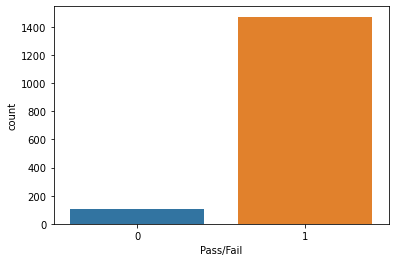

In [11]:
# PLot charts like bar, pie
sns.countplot(x = data['Pass/Fail'])

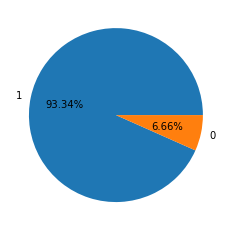

In [286]:
plt.figure()
plt.pie(data['Pass/Fail'].value_counts(), labels=data['Pass/Fail'].value_counts().index, autopct="%.2f%%" )
plt.show()

In [13]:
# Highly imbalance data

In [14]:
# Finding unique value coloumn
nunique = data.apply(pd.Series.nunique)
nunique

0            1489
1            1497
2             503
3             512
4             503
             ... 
586           319
587           256
588           119
589           602
Pass/Fail       2
Length: 577, dtype: int64

In [15]:
cont_col = nunique[nunique==1].index
cont_col

Index(['141', '178', '179', '186', '226', '229', '230', '231', '232', '233',
       ...
       '529', '530', '531', '532', '533', '534', '535', '536', '537', '538'],
      dtype='object', length=102)

In [16]:
# Drop the unique value columns
data.shape

(1577, 577)

In [17]:
# Must calculate the accuracy keeping all the columns

In [18]:
x = data.drop(columns=['Pass/Fail'])
y = data['Pass/Fail']

#### Check the accuracy using random forest classifier before dropping any columns

In [19]:
# Import Libraries
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10, stratify=y)

In [21]:
print(x_train.shape)
print(y_train.shape)

(1103, 576)
(1103,)


In [22]:
rf = RandomForestClassifier(random_state=10)

In [23]:
# Hypertuning of hyperparameters
from sklearn.model_selection import GridSearchCV
param_dict = {'criterion' : ["gini", "entropy"],
              'max_depth' : [3,4,5,6,7,8],
              'max_features' : ["auto", "sqrt", "log2"],
              'bootstrap' : [True, False]
             }
rf_gscv = GridSearchCV(rf, param_grid=param_dict, verbose=3, n_jobs=-1, cv=10)
rf_gscv.fit(x_train, y_train)


Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=3)

In [27]:
print(rf_gscv.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}


In [28]:
rf.set_params(bootstrap= False, criterion = 'entropy', max_depth= 8, max_features= 'auto')

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=8,
                       random_state=10)

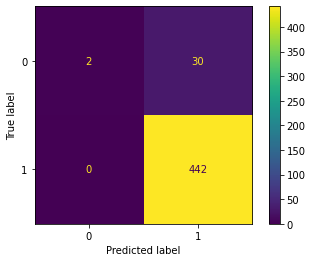

In [29]:
rf.fit(x_train,y_train)
rf_y_pred = rf.predict(x_test)
print(plot_confusion_matrix(rf, x_test, y_test))

In [30]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.06      0.12        32
           1       0.94      1.00      0.97       442

    accuracy                           0.94       474
   macro avg       0.97      0.53      0.54       474
weighted avg       0.94      0.94      0.91       474



#### Run the random forest classifier again after dropping the column which has single unique value

In [31]:
# Drop the unique value columns
data1 = data.drop(cont_col,axis=1)
data1.shape

(1577, 475)

In [32]:
x1 = data1.drop(columns=['Pass/Fail'])
y1 = data1['Pass/Fail']
print(x1.shape)
print(y1.shape)

(1577, 474)
(1577,)


In [33]:
# We must check the accuracy after dropping the columns
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.3,random_state=10, stratify=y1)
print(x1_train.shape)
print(y1_train.shape)

(1103, 474)
(1103,)


In [34]:
rf1 = RandomForestClassifier(random_state=10)
# Hypertuning of hyperparameters
param_dict1 = {'criterion' : ["gini", "entropy"],
              'max_depth' : [3,4,5,6,7,8],
              'max_features' : ["auto", "sqrt", "log2"],
              'bootstrap' : [True, False]
             }
rf_gscv1 = GridSearchCV(rf1, param_grid=param_dict1, verbose=3, n_jobs=-1, cv=10)
rf_gscv.fit(x1_train, y1_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(bootstrap=False,
                                              criterion='entropy', max_depth=8,
                                              random_state=10),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=3)

In [35]:
print(rf_gscv.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}


In [36]:
rf1.set_params(bootstrap= False, criterion= 'entropy', max_depth= 7, max_features= 'auto')

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=7,
                       random_state=10)

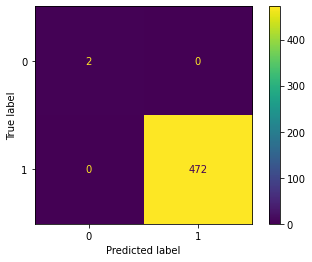

In [37]:
rf1.fit(x1_train,y1_train)
y_rf1_pred = rf1.predict(x1_test)
print(plot_confusion_matrix(rf1, x1_test, y_rf1_pred))

In [38]:
print(classification_report(y_test, y_rf1_pred))

              precision    recall  f1-score   support

           0       1.00      0.06      0.12        32
           1       0.94      1.00      0.97       442

    accuracy                           0.94       474
   macro avg       0.97      0.53      0.54       474
weighted avg       0.94      0.94      0.91       474



#### There is no drop in overall accuracy even after dropping the columns. 

In [39]:
X1 = data1.drop(columns=['Pass/Fail'])
Y1 = data1['Pass/Fail']

In [40]:
# For dimensional reduction work on multicollinearity appraoch

In [41]:
# Create Corr matrix
corr_mat = X1.corr()
corr_mat

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,227,228,238,239,244,245,246,247,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,365,366,367,368,376,377,382,383,384,385,386,387,388,389,390,391,392,393,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,467,468,469,470,471,472,473,474,475,476,477,478,479,480,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,499,500,510,511,516,517,518,519,520,521,522,523,524,525,526,527,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,1.000000,-0.051731,0.009742,0.005773,-0.001583,0.011104,0.008468,0.011955,-0.056840,0.012133,-0.017591,-0.002184,0.001246,-0.042683,0.007928,-0.002633,0.002357,0.008941,0.012924,-0.004946,-0.014800,0.019205,-0.006614,-0.016659,0.012698,0.017099,0.013448,0.055876,0.006871,-0.007209,0.004475,0.001386,-0.008008,0.004331,0.006125,-0.002699,-0.004291,-0.012262,0.002410,0.031904,0.016981,-0.014059,-0.026355,0.010844,0.023776,-0.000329,-0.040269,-0.015077,-0.009387,-0.030766,0.004603,0.005845,-0.013203,-0.003142,-0.003117,-0.008898,-0.079654,-0.013656,-0.004795,0.004141,-0.019296,0.011312,0.001412,-0.007186,-0.006595,-0.004122,-0.007787,0.013704,0.008840,0.009031,0.037457,0.019917,0.003905,0.030712,-0.070895,0.023521,0.053514,0.028016,0.005198,-0.007808,-0.001605,-0.001391,0.030751,-0.017955,-0.007265,0.003471,-0.007505,-0.021662,0.030375,-0.015613,0.000204,0.018904,-0.031432,-0.028352,0.024497,-0.022538,0.011438,-0.060543,0.028058,0.021414,-0.031808,0.008590,-0.038086,0.053424,0.054094,0.053284,-0.078640,-0.035798,0.001833,0.012597,0.062784,0.004702,-0.025102,-0.014430,0.024195,0.006334,-0.023016,0.005470,0.005472,0.018009,-0.042246,-0.025380,-0.019168,-0.052478,0.012475,0.005899,-0.002090,0.001545,0.004485,-0.022475,0.190199,0.087538,-0.003419,0.015487,-0.001784,0.000723,-0.020041,0.015308,0.028316,0.001757,-0.004623,0.006660,-0.000966,0.001208,0.002791,-0.012089,0.015784,-0.002656,0.014133,-0.023915,-0.079873,-0.013862,0.009760,0.024977,0.006287,0.001675,-0.002826,-0.007612,0.036627,0.022175,0.028284,0.021039,-0.027062,0.014663,0.005390,0.006308,0.005358,-0.003361,0.024674,-0.039653,0.036007,-0.003772,0.030710,0.028028,0.008371,0.011538,0.012059,-0.067276,0.014658,-0.005324,0.006458,0.000032,0.001260,0.004334,0.003904,-0.002440,-0.001692,-0.008053,-0.017346,0.002572,-0.013653,-0.010385,0.033577,-0.005058,-0.018993,-0.018033,0.028098,-0.028999,0.053522,-0.004772,-0.016154,-0.074077,-0.014284,0.037270,-0.017858,0.015090,-0.028246,-0.049043,-0.027113,-0.080058,0.009582,0.003661,0.025546,0.037249,0.037227,-0.024357,-0.008991,0.000173,-0.026115,0.003387,0.000110,0.001627,0.012987,-0.033933,0.065779,-0.036919,0.002731,-0.027571,0.189888,0.090551,-0.004800,0.016984,-0.001779,0.

In [42]:
# Select the upper traingle of corr matrix
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(bool))
upper

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,227,228,238,239,244,245,246,247,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,365,366,367,368,376,377,382,383,384,385,386,387,388,389,390,391,392,393,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,467,468,469,470,471,472,473,474,475,476,477,478,479,480,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,499,500,510,511,516,517,518,519,520,521,522,523,524,525,526,527,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,NaN,-0.051731,0.009742,0.005773,-0.001583,0.011104,0.008468,0.011955,-0.056840,0.012133,-0.017591,-0.002184,0.001246,-0.042683,0.007928,-0.002633,0.002357,0.008941,0.012924,-0.004946,-0.014800,0.019205,-0.006614,-0.016659,0.012698,0.017099,0.013448,0.055876,0.006871,-0.007209,0.004475,0.001386,-0.008008,0.004331,0.006125,-0.002699,-0.004291,-0.012262,0.002410,0.031904,0.016981,-0.014059,-0.026355,0.010844,0.023776,-0.000329,-0.040269,-0.015077,-0.009387,-0.030766,0.004603,0.005845,-0.013203,-0.003142,-0.003117,-0.008898,-0.079654,-0.013656,-0.004795,0.004141,-0.019296,0.011312,0.001412,-0.007186,-0.006595,-0.004122,-0.007787,0.013704,0.008840,0.009031,0.037457,0.019917,0.003905,0.030712,-0.070895,0.023521,0.053514,0.028016,0.005198,-0.007808,-0.001605,-0.001391,0.030751,-0.017955,-0.007265,0.003471,-0.007505,-0.021662,0.030375,-0.015613,0.000204,0.018904,-0.031432,-0.028352,0.024497,-0.022538,0.011438,-0.060543,0.028058,0.021414,-0.031808,0.008590,-0.038086,0.053424,0.054094,0.053284,-0.078640,-0.035798,0.001833,0.012597,0.062784,0.004702,-0.025102,-0.014430,0.024195,0.006334,-0.023016,0.005470,0.005472,0.018009,-0.042246,-0.025380,-0.019168,-0.052478,0.012475,0.005899,-0.002090,0.001545,0.004485,-0.022475,0.190199,0.087538,-0.003419,0.015487,-0.001784,0.000723,-0.020041,0.015308,0.028316,0.001757,-0.004623,0.006660,-0.000966,0.001208,0.002791,-0.012089,0.015784,-0.002656,0.014133,-0.023915,-0.079873,-0.013862,0.009760,0.024977,0.006287,0.001675,-0.002826,-0.007612,0.036627,0.022175,0.028284,0.021039,-0.027062,0.014663,0.005390,0.006308,0.005358,-0.003361,0.024674,-0.039653,0.036007,-0.003772,0.030710,0.028028,0.008371,0.011538,0.012059,-0.067276,0.014658,-0.005324,0.006458,0.000032,0.001260,0.004334,0.003904,-0.002440,-0.001692,-0.008053,-0.017346,0.002572,-0.013653,-0.010385,0.033577,-0.005058,-0.018993,-0.018033,0.028098,-0.028999,0.053522,-0.004772,-0.016154,-0.074077,-0.014284,0.037270,-0.017858,0.015090,-0.028246,-0.049043,-0.027113,-0.080058,0.009582,0.003661,0.025546,0.037249,0.037227,-0.024357,-0.008991,0.000173,-0.026115,0.003387,0.000110,0.001627,0.012987,-0.033933,0.065779,-0.036919,0.002731,-0.027571,0.189888,0.090551,-0.004800,0.016984,-0.001779,0.00037

In [43]:
# finding the columns having corr coeff more than 0.9 and less than -0.9
neg_corelated = [column for column in upper.columns
                if any(upper[column]<=-0.9)]
pos_corelated = [column for column in upper.columns
                if any(upper[column]>=0.9)]
print(neg_corelated)
print("************************"*5)
print(pos_corelated)

['96', '104', '105', '106']
************************************************************************************************************************
['5', '18', '27', '38', '39', '50', '54', '55', '56', '57', '58', '66', '70', '73', '101', '110', '111', '123', '124', '127', '131', '133', '140', '148', '152', '154', '164', '165', '174', '199', '204', '207', '220', '245', '246', '249', '252', '270', '271', '272', '273', '274', '275', '277', '278', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '317', '318', '319', '320', '321', '323', '324', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '365', '366', '376', '377', '382', '383', '384

In [44]:
total_correlated = neg_corelated + pos_corelated
print(total_correlated)

['96', '104', '105', '106', '5', '18', '27', '38', '39', '50', '54', '55', '56', '57', '58', '66', '70', '73', '101', '110', '111', '123', '124', '127', '131', '133', '140', '148', '152', '154', '164', '165', '174', '199', '204', '207', '220', '245', '246', '249', '252', '270', '271', '272', '273', '274', '275', '277', '278', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '317', '318', '319', '320', '321', '323', '324', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '365', '366', '376', '377', '382', '383', '384', '385', '386', '387', '388', '389', '390', '391', '392', '393', '405', '406', '407', '408', '409', '410', '411', '413', 

In [45]:
len(total_correlated)

226

In [46]:
df = data1.drop(total_correlated, axis = 1)
df.shape

(1577, 249)

In [47]:
# Must check the accuracy after dropping the columns

In [48]:
data.isnull().sum()[data.isnull().sum()>=1000]/len(data)*100

Series([], dtype: float64)

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_feature=scaler.fit_transform(df)
scaled_feature=pd.DataFrame(scaled_feature,columns=df.columns)
scaled_feature


,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,40,41,42,43,44,45,46,47,48,51,53,59,60,61,62,63,64,65,67,68,71,72,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,98,99,100,102,103,107,108,109,112,113,114,115,116,117,118,119,120,121,122,125,126,128,129,130,132,134,135,136,137,138,139,142,143,144,145,146,147,150,151,153,155,156,157,158,159,160,161,162,163,166,167,168,169,170,171,172,173,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,200,201,202,203,205,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,244,247,248,250,251,253,254,255,267,268,269,316,345,367,368,412,418,419,423,430,431,432,433,438,439,460,468,472,473,474,476,480,482,483,484,485,486,487,488,489,496,499,500,510,511,521,542,543,544,546,547,549,550,551,555,558,559,560,562,564,565,570,571,572,573,578,579,581,582,583,586,587,589,Pass/Fail
0,0.886040,0.828758,0.948770,0.286993,0.001094,0.788304,0.906716,0.878049,0.375682,0.393629,0.970146,0.728662,0.487151,0.488999,0.104189,0.987002,0.959907,0.802338,0.110171,0.834530,0.507561,0.563973,0.719916,0.926150,0.844673,0.895560,0.781831,0.979019,0.809231,0.371240,0.841522,0.681195,0.990753,0.972611,0.168950,0.130201,1.0,0.951442,0.914440,0.739457,0.919969,0.884257,0.905155,0.830678,0.953820,0.282867,0.955315,0.882341,0.389250,0.056138,0.269973,0.170355,0.000151,0.907163,0.302348,0.253214,0.150713,0.557060,0.412284,0.527118,0.724225,0.834922,0.363985,0.644980,0.780266,0.942193,0.0,0.551757,0.987191,0.428383,0.138249,0.795582,0.367097,0.366093,0.549342,0.612903,0.666667,0.675253,0.357926,0.566038,0.643663,0.505639,0.414997,0.349161,0.0,0.931423,0.762408,0.0,0.511563,0.983398,0.019918,0.955004,0.944915,0.677768,0.982576,0.523879,0.372252,0.691807,0.915276,0.712089,0.782981,0.946608,0.570364,0.136821,0.418864,0.452047,0.452045,0.271621,0.044298,0.355372,0.083960,0.319107,0.252521,0.020750,0.552379,0.012625,0.051486,0.035405,0.011322,0.0,0.0,0.018611,0.134772,0.020768,0.004258,0.129572,0.146919,0.036810,0.077241,0.139983,0.812229,0.267206,0.526076,0.528636,0.734044,0.445477,0.117869,0.304500,0.113070,0.128727,0.232731,0.043119,0.023590,0.030559,0.212892,0.047747,0.022746,0.065449,0.028352,0.068230,0.071208,0.026252,0.048145,0.027433,0.604941,0.0,0.241867,0.254416,0.120013,0.075797,0.139199,0.276174,0.187058,0.142349,0.536374,0.202454,0.072684,0.000303,0.018010,0.046654,0.405659,0.199870,0.090483,0.168033,0.177966,0.0,0.220798,0.017831,0.115159,0.000909,0.060438,0.033766,0.285875,0.442966,0.208040,0.229796,0.337666,0.000000,0.100840,0.215569,0.351647,0.000000,0.000000,0.305193,0.005698,0.046047,0.021313,0.010510,0.022406,0.038197,0.127292,0.033656,0.261761,0.189793,0.154100,0.148976,0.651425,0.230419,0.196503,0.000000,0.294177,0.183862,0.126301,0.128639,0.563144,0.149733,0.000000,0.000000,0.152304,0.000000,0.0,0.925676,0.325,0.553191,0.153572,0.951098,0.041822,0.240794,0.060071,0.159359,0.665829,0.308373,0.200808,0.851935,0.160221,0.078787,0.800072,0.746490,0.007249,0.024460,0.141186,0.000000,0.000000,0.985681,0.027153,0.307435,0.110821,0.079433,0.0
1,0.909565,0.887189,0.944283,0.293062,0.001142,0.801250,0.907463,0.898998,0.410756,0.296928,0.974817,0.745181,0.125199,0.499957,0.104666,0.989033,0.963048,0.735842,0.120276,0.829470,0.487034,0.563878,0.713408,0.922740,0.901725,0.749993,0.682918,0.970215,0.803172,0.369706,0.840727,0.681218,0.991699,0.970734,0.909313,0.065442,1.0,0.955540,0.883425,0.880858,0.963675,0.716961,0.823869,0.815019,0.963266,0.130558,0.966750,0.840864,0.437578,0.059087,0.474622,0.276366,0.000166,0.876331,0.292478,0.973840,0.222949,0.646035,0.480438,0.528959,0.375079,0.669844,0.413155,0.678912,0.800854,0.916944,0.0,0.586901,0.971638,0.489780,0.136688,0.851453,0.431569,0.299754,0.615132,0.645161,0.611111,0.693069,0.432907,0.566038,0.651824,0.537594,0.437116,0.247971,0.0,0.000000,0.742880,0.0,0.653663,0.983398,0.023666,0.946357,0.910311,0.451734,0.982576,0.543185,0.414199,0.687798,0.808472,0.621068,0.876857,0.95

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["variables"]=scaled_feature.columns
vif["VIF"] = [variance_inflation_factor(scaled_feature.values,i)
              for i in range(scaled_feature.shape[1])]
vif

,variables,VIF
0,0,331.003350
1,1,216.854058
2,2,1395.023840
3,3,83.814227
4,4,3.967305
...,...,...
244,583,3.064705
245,586,26.699953
246,587,10.750775
247,589,6.939793


In [51]:
high_vif = vif[vif['VIF']>10].sort_values('VIF')
high_vif

,variables,VIF
181,254,10.266838
218,510,10.385283
246,587,10.750775
34,40,11.044051
116,153,11.104431
...,...,...
36,42,37229.136138
33,37,87756.607557
39,45,113173.458684
37,43,328461.604769


In [52]:
import statsmodels.api as sm
df1 = sm.add_constant(df)

In [53]:
vif1=pd.DataFrame()
vif1["variables"]=df1.columns
vif1["VIF"] = [variance_inflation_factor(df1.values,i)
              for i in range(df1.shape[1])]
vif1

,variables,VIF
0,const,123460.722908
1,0,1.273804
2,1,1.217282
3,2,12.647160
4,3,8.295323
...,...,...
245,583,1.264107
246,586,2.502413
247,587,3.302547
248,589,3.255377


In [58]:
high_vif1 = vif1[vif1['VIF']>10].sort_values('VIF')
high_vif1
print(high_vif1.shape)

(60, 2)


In [59]:
# Must check the accuracy before and after drop

In [60]:
df2=df1.drop(high_vif1["variables"],axis=1)

df2.shape

(1577, 190)

In [61]:
df2.head()

,0,1,3,4,6,7,8,9,10,11,12,15,17,19,20,21,23,24,28,29,30,32,33,35,40,41,47,53,59,71,72,75,76,77,78,79,80,81,82,83,84,85,86,87,88,90,91,92,93,95,99,100,102,103,107,108,109,112,113,114,115,116,117,118,119,120,122,125,126,128,129,130,134,135,136,137,138,142,143,144,145,146,151,153,155,156,157,158,161,162,163,166,167,168,169,170,171,172,173,175,176,177,180,181,182,183,184,185,187,195,198,210,211,212,213,214,215,216,217,218,219,221,222,223,225,227,228,238,239,244,247,248,250,251,253,254,255,267,268,269,316,345,367,368,418,419,432,433,438,439,468,472,476,482,483,484,485,486,487,488,489,499,500,510,511,521,542,543,544,546,550,551,558,559,560,562,564,565,570,571,572,573,578,581,582,583,586,587,589,Pass/Fail
0,2973.86,2359.01,1066.1908,1.2188,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,403.3885,0.9720,12.4690,1.3993,-6362.50,-3718.50,1500.25,65.8000,3.1444,0.2229,85.4579,8.6667,64.2122,14.55,4.866,1.3362,4.544,26.7745,72.1031,0.0000,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,0.0,2.4152,0.9907,1832.1146,8549.8000,-0.0928,0.0023,-0.0004,0.0003,-0.0223,0.0000,0.0010,-0.0060,-0.1042,-0.0873,0.0,0.4550,0.9471,0.0,738.6785,0.9907,57.9642,0.5964,0.9749,6.7499,3.609,0.9176,2.761,3.565,0.6623,0.6956,36.5767,136.0,123.9,151.3,64.0999,4.58,0.0043,0.0525,0.0800,0.0626,6.774,0.0123,0.45,0.0359,0.0,0.0,788.0,157.0,0.124,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.8603,0.1965,0.219,14.82,0.404,7.08,16.977,0.1392,6.32,9.41,0.231,0.284,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,0.0353,0.0006,63.5398,1460.8999,0.0308,0.0193,0.0041,0.0042,0.0,0.1085,0.0203,147.5352,0.0012,0.0273,0.0043,0.3552,0.0699,8.140,2.3331,4.4220,0.0000,0.0036,0.0072,0.0000,0.0000,21.1913,10.4649,19.0813,25.1246,33.6514,128.9886,40.9515,230.2835,194.4346,0.0000,292.4117,183.7686,125.7636,128.3202,559.7668,0.0000,0.0000,68.7631,0.000,0.0,0.1096,0.0078,0.0026,0.6110,21.84,1.53,1.0068,0.3311,0.0895,265.296,5.22,0.0543,535.0655,2.2935,8.10,0.1188,0.0000,0.0000,0.5025,0.0128,0.0199,0.0117,58.5665,0
1,3052.82,2525.33,1088.7359,1.2723,103.5633,0.1216,1.4891,-0.0007,-0.0088,0.9600,202.7228,412.4277,0.9740,12.5098,1.3811,-6290.25,-3972.00,1497.50,70.2444,2.6333,0.1947,84.8180,8.6309,64.2144,78.31,2.408,1.0834,4.589,-3.2509,69.7495,169.2684,-0.0299,-0.0192,0.0096,-0.0322,0.0025,0.0320,-0.0335,0.0292,7.2000,0.1380,0.0,2.4262,0.9873,1861.4446,9150.2299,-0.0464,-0.0004,0.0016,0.0002,0.0837,0.0000,0.0078,-0.0043,-0.0819,-0.1621,0.0,0.0000,0.9447,0.0,792.7484,0.9907,58.9346,0.5910,0.9700,6.2083,3.742,1.0210,2.745,3.149,0.0946,0.7790,37.9038,98.0,74.3,84.8,65.0000,5.96,0.0052,0.2425,0.0529,0.0488,12.072,0.0111,0.41,0.0394,0.0,0.0,1326.0,51.0,0.092,2.6,1.0,0.091,0.129,0.9737,0.1305,0.3313,0.5099,0.8317,0.2906,0.372,14.61,0.247,7.28,25.141,0.0865,6.10,20.96,0.243,0.738,0.1068,0.0349,0.0320,0.0857,0.0741,0.0845,0.0839,0.0646,5.8604,0.0024,0.0438,0.0016,121.8027,1499.0000,0.0238,0.0222,0.0061,0.0036,0.0,0.0000,0.0194,124.7869,0.0007,0.0362,0.0185,0.2213,0.0836,8.980,1.9870,4.8207,7.9617,0.0039,0.0047,0.0000,556.1254,33.3837,3.4057,37.9747,46.7466,114.4298,144.6852,60.9140,356.8922,182.2454,335.0785,266.1491,0.0000,264.0625,250.6348,221.4857,0.0000,0.0000,142.6901,320.000,0.0,0.1096,0.0078,0.0026,0.7262,17.61,0.83,1.0052,0.5784,0.1201,261.956,9.90,0.0918,531.0300,2.2599,9.08,0.2787,0.0228,131.2543,0.5003,0.0150,0.0228,0.0299,131.2543,1
2,2914.47,2492.14,1083.3937,1.2484,104.1478,0.1219,1.5568,-0.0214,-0.0043,0.9515,202.4492,414.3435,0.9738,12.4371,1.3974,-5389.25,-4318.50,-2849.00,61.2222,2.6889,0.2276,85.6626,9.1502,64.1871,72.29,3.958,1.3603,4.641,0.2309,90.4021,145.5469,-0.0215,0.0285,0.0267,-0.0292,-0.0101,-0.0680,-0.0304,0.0430,7.0330,0.1255,0.0,2.4080,0.9675,1786.5706,9007.0400,-0.0290,0.0004,-0.0020,0.0001,-0.0149,-0.0003,0.0441,-0.0054,0.0447,0.0595,0.0,0.0000,0.9451,0.0,642.7469,0.9894,59.7038,0.5976,0.9789,6.5004,3.609,0.9176,2.761,3.565,0.6623,0.6956,36.5767,94.0,65.8,150.9,63.2002,6.60,0.0047,0.0967,0.0598,0.0518,11.

In [62]:
X3 = df2.drop(columns=['Pass/Fail'])
Y3 = df2['Pass/Fail']

In [63]:
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.3, random_state=10, stratify=Y3)
print(x3_train.shape)
print(y3_train.shape)

(1103, 189)
(1103,)


In [64]:
rf3 = RandomForestClassifier(random_state=10)

In [65]:
# Hypertuning of hyperparameters
param_dict3 = {'criterion' : ["gini", "entropy"],
              'max_depth' : [3,4,5,6,7,8],
              'max_features' : ["auto", "sqrt", "log2"],
              'bootstrap' : [True, False]
             }
rf_gscv3 = GridSearchCV(rf3, param_grid=param_dict3, verbose=3, n_jobs=-1, cv=10)
rf_gscv3.fit(x3_train, y3_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=3)

In [66]:
print(rf_gscv3.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto'}


In [67]:
rf3.set_params(bootstrap = False, criterion = 'entropy', max_depth =  7, max_features = 'auto')

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=7,
                       random_state=10)

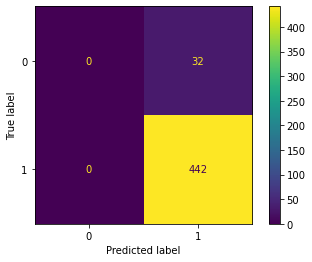

In [68]:
rf3.fit(x3_train, y3_train)
rf3_y_pred = rf3.predict(x3_test)
print(plot_confusion_matrix(rf3, x3_test, y3_test))

In [69]:
print(classification_report(y3_test,rf3_y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.93      1.00      0.97       442

    accuracy                           0.93       474
   macro avg       0.47      0.50      0.48       474
weighted avg       0.87      0.93      0.90       474



#### There is slight reduction by 1% in overall accuracy, however we are able to drop 60 columns.

### Recursive Feature Ellimination

In [70]:
from sklearn.feature_selection import RFECV, SelectFromModel

In [77]:
scaled_feature.head()

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,40,41,42,43,44,45,46,47,48,51,53,59,60,61,62,63,64,65,67,68,71,72,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,98,99,100,102,103,107,108,109,112,113,114,115,116,117,118,119,120,121,122,125,126,128,129,130,132,134,135,136,137,138,139,142,143,144,145,146,147,150,151,153,155,156,157,158,159,160,161,162,163,166,167,168,169,170,171,172,173,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,200,201,202,203,205,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,244,247,248,250,251,253,254,255,267,268,269,316,345,367,368,412,418,419,423,430,431,432,433,438,439,460,468,472,473,474,476,480,482,483,484,485,486,487,488,489,496,499,500,510,511,521,542,543,544,546,547,549,550,551,555,558,559,560,562,564,565,570,571,572,573,578,579,581,582,583,586,587,589,Pass/Fail
0,0.886040,0.828758,0.948770,0.286993,0.001094,0.788304,0.906716,0.878049,0.375682,0.393629,0.970146,0.728662,0.487151,0.488999,0.104189,0.987002,0.959907,0.802338,0.110171,0.834530,0.507561,0.563973,0.719916,0.926150,0.844673,0.895560,0.781831,0.979019,0.809231,0.371240,0.841522,0.681195,0.990753,0.972611,0.168950,0.130201,1.0,0.951442,0.914440,0.739457,0.919969,0.884257,0.905155,0.830678,0.953820,0.282867,0.955315,0.882341,0.389250,0.056138,0.269973,0.170355,0.000151,0.907163,0.302348,0.253214,0.150713,0.557060,0.412284,0.527118,0.724225,0.834922,0.363985,0.644980,0.780266,0.942193,0.0,0.551757,0.987191,0.428383,0.138249,0.795582,0.367097,0.366093,0.549342,0.612903,0.666667,0.675253,0.357926,0.566038,0.643663,0.505639,0.414997,0.349161,0.0,0.931423,0.762408,0.0,0.511563,0.983398,0.019918,0.955004,0.944915,0.677768,0.982576,0.523879,0.372252,0.691807,0.915276,0.712089,0.782981,0.946608,0.570364,0.136821,0.418864,0.452047,0.452045,0.271621,0.044298,0.355372,0.083960,0.319107,0.252521,0.020750,0.552379,0.012625,0.051486,0.035405,0.011322,0.0,0.0,0.018611,0.134772,0.020768,0.004258,0.129572,0.146919,0.036810,0.077241,0.139983,0.812229,0.267206,0.526076,0.528636,0.734044,0.445477,0.117869,0.304500,0.113070,0.128727,0.232731,0.043119,0.023590,0.030559,0.212892,0.047747,0.022746,0.065449,0.028352,0.068230,0.071208,0.026252,0.048145,0.027433,0.604941,0.0,0.241867,0.254416,0.120013,0.075797,0.139199,0.276174,0.187058,0.142349,0.536374,0.202454,0.072684,0.000303,0.018010,0.046654,0.405659,0.199870,0.090483,0.168033,0.177966,0.0,0.220798,0.017831,0.115159,0.000909,0.060438,0.033766,0.285875,0.442966,0.208040,0.229796,0.337666,0.000000,0.100840,0.215569,0.351647,0.000000,0.000000,0.305193,0.005698,0.046047,0.021313,0.010510,0.022406,0.038197,0.127292,0.033656,0.261761,0.189793,0.154100,0.148976,0.651425,0.230419,0.196503,0.000000,0.294177,0.183862,0.126301,0.128639,0.563144,0.149733,0.000000,0.000000,0.152304,0.000000,0.0,0.925676,0.325,0.553191,0.153572,0.951098,0.041822,0.240794,0.060071,0.159359,0.665829,0.308373,0.200808,0.851935,0.160221,0.078787,0.800072,0.746490,0.007249,0.024460,0.141186,0.000000,0.000000,0.985681,0.027153,0.307435,0.110821,0.079433,0.0
1,0.909565,0.887189,0.944283,0.293062,0.001142,0.801250,0.907463,0.898998,0.410756,0.296928,0.974817,0.745181,0.125199,0.499957,0.104666,0.989033,0.963048,0.735842,0.120276,0.829470,0.487034,0.563878,0.713408,0.922740,0.901725,0.749993,0.682918,0.970215,0.803172,0.369706,0.840727,0.681218,0.991699,0.970734,0.909313,0.065442,1.0,0.955540,0.883425,0.880858,0.963675,0.716961,0.823869,0.815019,0.963266,0.130558,0.966750,0.840864,0.437578,0.059087,0.474622,0.276366,0.000166,0.876331,0.292478,0.973840,0.222949,0.646035,0.480438,0.528959,0.375079,0.669844,0.413155,0.678912,0.800854,0.916944,0.0,0.586901,0.971638,0.489780,0.136688,0.851453,0.431569,0.299754,0.615132,0.645161,0.611111,0.693069,0.432907,0.566038,0.651824,0.537594,0.437116,0.247971,0.0,0.000000,0.742880,0.0,0.653663,0.983398,0.023666,0.946357,0.910311,0.451734,0.982576,0.543185,0.414199,0.687798,0.808472,0.621068,0.876857,0.95

In [138]:
scaled_feature.shape

(1577, 249)

In [83]:
high_vif1["variables"][:-1]

102    132
201    460
242    579
28      31
226    547
194    423
145    188
20      22
154    205
13      14
155    208
150    200
3        2
230    555
71      89
148    197
115    150
95     121
216    496
227    549
15      16
78      98
44      51
76      94
191    412
207    480
108    139
114    147
37      42
43      48
205    474
33      36
53      67
39      44
24      26
170    224
156    209
50      63
23      25
31      34
204    473
54      68
153    203
52      65
48      61
34      37
151    201
147    196
122    159
123    160
47      60
51      64
152    202
49      62
38      43
196    431
195    430
40      45
41      46
Name: variables, dtype: object

In [84]:
scaled_feature1=scaled_feature.drop(high_vif1["variables"][:-1],axis=1)

scaled_feature1.shape

(1577, 190)

In [86]:
X4 = scaled_feature1.drop(columns='Pass/Fail')
Y4 = scaled_feature1['Pass/Fail']
print(X4.shape)
print(Y4.shape)

(1577, 189)
(1577,)


In [87]:
x4_train, x4_test, y4_train, y4_test = train_test_split(X4, Y4, test_size=0.3, random_state=10, stratify=Y4)
print(x4_train.shape)
print(y4_train.shape)

(1103, 189)
(1103,)


In [88]:
sfm = SelectFromModel(RandomForestClassifier(random_state=10))

In [89]:
sfm.fit(x4_train, y4_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=10))

In [90]:
sfm.get_support()

array([ True, False, False, False, False, False, False,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True, False, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False, False, False,  True, False,  True,  True,  True,  True,
        True, False, False, False, False,  True,  True, False, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
        True, False,  True, False,  True, False, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False,  True,  True, False,  True, False, False,
       False,  True, False, False,  True,  True, False, False,  True,
        True,  True,

In [91]:
print("Benchmark - Mean of feature importance", np.mean(sfm.estimator_.feature_importances_))

Benchmark - Mean of feature importance 0.005291005291005291


In [92]:
sfm.estimator_.feature_importances_

array([0.01361018, 0.00449322, 0.00269129, 0.00357189, 0.00273229,
       0.00364582, 0.00450097, 0.00661856, 0.00457625, 0.00667242,
       0.00424066, 0.00190775, 0.00575649, 0.00561331, 0.00604958,
       0.00861909, 0.00653268, 0.00548369, 0.00646863, 0.00423963,
       0.00682874, 0.00434287, 0.00853525, 0.00406994, 0.01304325,
       0.00451144, 0.00449525, 0.00489347, 0.01365801, 0.01079534,
       0.00306779, 0.00651723, 0.00541257, 0.00516061, 0.00786579,
       0.00655423, 0.01049636, 0.00781437, 0.00727998, 0.00867751,
       0.00457037, 0.0001159 , 0.005819  , 0.00746444, 0.00704813,
       0.00406247, 0.0041895 , 0.00249121, 0.00567141, 0.0014284 ,
       0.00766683, 0.00722518, 0.01088997, 0.01346128, 0.00776818,
       0.00397699, 0.00079622, 0.00483987, 0.00406584, 0.00547725,
       0.00924954, 0.00326393, 0.00413745, 0.00390155, 0.00391956,
       0.00843309, 0.00328452, 0.00334091, 0.00743503, 0.00340455,
       0.0053271 , 0.00303267, 0.00236473, 0.00175833, 0.00240

In [93]:
feature_selected = x4_train.columns[sfm.get_support()]
feature_selected

Index(['0', '9', '11', '17', '19', '20', '21', '23', '24', '28', '30', '33',
       '40', '59', '71', '75', '76', '78', '79', '80', '81', '82', '83', '86',
       '87', '88', '93', '99', '100', '102', '103', '107', '114', '115', '120',
       '126', '129', '137', '138', '144', '146', '153', '156', '167', '168',
       '171', '183', '184', '187', '195', '210', '211', '213', '217', '221',
       '222', '227', '228', '238', '239', '247', '248', '250', '267', '269',
       '345', '433', '438', '439', '472', '488', '500', '510', '550', '551',
       '559', '562', '571', '572', '573', '582', '583', '587'],
      dtype='object')

In [95]:
final_variable = pd.DataFrame(feature_selected)
final_variable

,0
0,0
1,9
2,11
3,17
4,19
...,...
78,572
79,573
80,582
81,583


In [96]:
final_variable.shape

(83, 1)

In [97]:
X_train_final = x4_train[feature_selected]

In [98]:
X_train_final.shape

(1103, 83)

In [99]:
X_test_final = x4_test[feature_selected]
X_test_final.shape

(474, 83)

In [139]:
y4_train.shape

(1103,)

In [101]:
y4_train.value_counts()

1.0    1030
0.0      73
Name: Pass/Fail, dtype: int64

#### Linear Descriminant Analysis (LDA)

In [109]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [107]:
X_train_final.head()

,0,9,11,17,19,20,21,23,24,28,30,33,40,59,71,75,76,78,79,80,81,82,83,86,87,88,93,99,100,102,103,107,114,115,120,126,129,137,138,144,146,153,156,167,168,171,183,184,187,195,210,211,213,217,221,222,227,228,238,239,247,248,250,267,269,345,433,438,439,472,488,500,510,550,551,559,562,571,572,573,582,583,587
238,0.889195,0.373344,0.969842,0.968420,0.970477,0.848374,0.108423,0.480394,0.565677,0.858223,0.733427,0.368438,0.893753,0.192583,0.403224,0.252973,0.582592,0.461332,0.714105,0.089592,0.507024,0.446439,0.878003,0.430990,0.984904,0.531824,0.552632,0.348023,0.566038,0.529525,0.552632,0.478080,0.0,0.610856,0.513209,0.685542,0.605900,0.541380,0.456981,0.107788,0.321501,0.106321,0.014380,0.049080,0.096552,0.091498,0.401867,0.027042,0.064885,0.054568,0.265298,0.171367,0.031004,0.049377,0.268409,0.000807,0.118105,0.081575,0.184426,0.207627,0.089337,0.010719,0.066387,0.590621,0.334013,0.000000,0.010111,0.033155,0.050892,0.179227,0.453252,0.00000,0.286823,0.000000,0.000000,0.876595,0.839109,0.749844,0.002224,0.120235,0.982346,0.029275,0.048240
28,0.885718,0.466875,0.973700,0.972177,0.965935,0.837779,0.270305,0.484362,0.535549,0.849380,0.637671,0.378612,0.890269,0.213570,0.407898,0.240190,0.475435,0.477402,0.849462,0.203965,0.666028,0.651711,0.779031,0.476358,0.979414,0.351722,0.601974,0.332249,0.547170,0.764762,0.454887,0.478476,0.0,0.571725,0.487125,0.672764,0.507295,0.633104,0.428774,0.213498,0.146027,0.089577,0.019082,0.036810,0.089655,0.065587,0.278051,0.057027,0.044718,0.026457,0.345081,0.180353,0.054374,0.062871,0.349169,0.001817,0.197274,0.168776,0.217213,0.173729,0.121490,0.015461,0.065743,0.149556,0.295472,0.017247,0.045440,0.032025,0.054363,0.224184,0.000000,0.00000,0.134352,0.143881,0.051826,0.125081,0.840728,0.735975,0.005715,0.175915,0.987838,0.029062,0.173403
1021,0.901601,0.458301,0.961515,0.985276,0.955550,0.866642,0.184015,0.418490,0.349665,0.883326,0.564714,0.367526,0.917789,0.119047,0.544796,0.311831,0.590329,0.733010,0.387097,0.565002,0.487229,0.645822,0.855924,0.661022,0.893413,0.181075,0.549342,0.326307,0.547170,0.661306,0.379699,0.525888,0.0,0.559559,0.486582,0.756201,0.158730,0.314610,0.343443,0.182153,0.153691,0.070322,0.008491,0.122699,0.270345,0.353036,0.436137,0.035220,0.072224,0.060149,0.202556,0.168578,0.022124,0.069395,0.258432,0.004845,0.071382,0.058603,0.274590,0.313559,0.000000,0.018141,0.098141,0.299747,0.400053,0.000000,0.100417,0.123605,0.185081,0.333965,0.497472,0.00000,0.116620,0.159647,0.048292,0.151346,0.877786,0.671688,0.007049,0.056854,0.983131,0.030335,0.050847
1047,0.909226,0.517537,0.993197,0.997665,0.968013,0.842528,0.209748,0.571003,0.019918,0.917701,0.599790,0.375275,0.936716,0.146790,0.421153,0.276159,0.786460,0.586876,0.176471,0.468929,0.536398,0.648065,0.785916,0.786901,0.970723,0.434436,0.296053,0.411190,0.622642,0.680389,0.441729,0.691331,0.0,0.762967,0.507533,0.716111,0.000000,0.341500,0.409732,0.203742,0.302138,0.020929,0.009222,0.085890,0.211034,0.243522,0.398454,0.046805,0.057481,0.060149,0.133230,0.202975,0.055932,0.163108,0.214252,0.002321,0.177158,0.070792,0.176230,0.258475,0.000000,0.014430,0.041790,0.653992,0.361650,0.000000,0.095983,0.073609,0.136027,0.255583,0.669032,0.18714,0.101321,0.180926,0.054967,0.390239,0.826605,0.552606,0.001334,0.178263,0.989408,0.037548,0.212516
731,0.908290,0.463757,0.983753,0.994720,0.960315,0.818780,0.223908,0.481508,0.468800,0.879902,0.706068,0.366733,0.917325,0.145670,0.242394,0.347503,0.350870,0.522933,0.356104,0.364849,0.520434,0.565620,0.876757,0.383387,0.959744,0.421875,0.588816,0.326307,0.528302,0.662626,0.422932,0.585697,0.0,0.440551,0.451442,0.821097,0.605900,0.553630,0.429479,0.161043,0.291246,0.025115,0.019402,0.122699,0.217931,0.270040,0.306963,0.029923,0.044523,0.038446,0.114833,0.129532,0.022669,0.048191,0.251306,0.003936,0.121350,0.052977,0.225410,0.211864,0.037648,0.023913,0.058391,0.433460,0.298604,0.000000,0.189738,0.095640,0.119309,0.278785,0.450745,0.00000,0.117559,0.246417,0.062819,0.098072,0.813625,0.582561,0.008227,0.09798

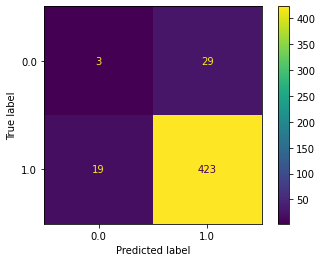

In [114]:
lda = LDA()
lda.fit(X_train_final, y4_train)
y4_predict = lda.predict(X_test_final)
print(plot_confusion_matrix(lda, X_test_final, y4_test))

In [115]:
print(classification_report(y4_test, y4_predict))

              precision    recall  f1-score   support

         0.0       0.14      0.09      0.11        32
         1.0       0.94      0.96      0.95       442

    accuracy                           0.90       474
   macro avg       0.54      0.53      0.53       474
weighted avg       0.88      0.90      0.89       474



In [129]:
x_train_lda = lda.fit_transform(X_train_final, y4_train)
x_test_lda = lda.fit_transform(X_test_final, y4_test)

In [130]:
print(x_train_lda.shape)
print(y4_train.shape)

(1103, 1)
(1103,)


In [131]:
print(x_test_lda.shape)
print(y4_test.shape)

(474, 1)
(474,)


### Run Random Forest model on transformed X-data by LDA

In [202]:
rf_lda = RandomForestClassifier(random_state=10)

In [203]:
param_dict_lda = {'criterion' : ["gini", "entropy"],
              'max_depth' : [3,4,5,6,7,8],
              'max_features' : ["auto", "sqrt", "log2"],
              'bootstrap' : [True, False],
              'class_weight' : [{0:100, 1:1},{0:10, 1:1}, {0:5, 1:1}]
             }
rf_gscv_lda = GridSearchCV(rf_lda, param_grid=param_dict_lda, verbose=3, n_jobs=-1, cv=10)
rf_gscv_lda.fit(x_train_lda, y4_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
                                          {0: 5, 1: 1}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=3)

In [204]:
rf_gscv_lda.best_params_

{'bootstrap': True,
 'class_weight': {0: 5, 1: 1},
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto'}

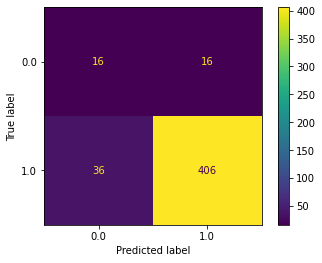

In [205]:
rf_lda.set_params(class_weight = {0: 5, 1: 1}, bootstrap = True, criterion = 'gini', max_depth =  6, max_features = 'auto')
rf_lda.fit(x_train_lda, y4_train)
rf_y_lda_pred = rf_lda.predict(x_test_lda)
print(plot_confusion_matrix(rf_lda, x_test_lda,y4_test))

In [206]:
print(classification_report(y4_test, rf_y_lda_pred))

              precision    recall  f1-score   support

         0.0       0.31      0.50      0.38        32
         1.0       0.96      0.92      0.94       442

    accuracy                           0.89       474
   macro avg       0.63      0.71      0.66       474
weighted avg       0.92      0.89      0.90       474



### Run Decision Tree model on Trasnformed X-data by LDA

In [140]:
print(x_train_lda.shape)
print(y4_train.shape)
print(x_test_lda.shape)
print(y4_test.shape)

(1103, 1)
(1103,)
(474, 1)
(474,)


In [141]:
from sklearn.tree import DecisionTreeClassifier

In [242]:
dt = DecisionTreeClassifier(random_state=10)

In [251]:
dt_param_dict = {'criterion' : ["gini", "entropy"],
              'max_depth' : [3,4,5,6,7,8],
              'max_features' : ["auto", "sqrt", "log2"],
              'class_weight' : [{0:100, 1:1},{0:10, 1:1}, {0:5, 1:1}]
              }
dt_gscv = GridSearchCV(dt, param_grid=dt_param_dict, cv= 10, verbose=4, n_jobs=-1)
dt_gscv.fit(x_train_lda, y4_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight={0: 5, 1: 1},
                                              max_depth=4, max_features='auto',
                                              random_state=10),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
                                          {0: 5, 1: 1}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=4)

In [252]:
dt_gscv.best_params_

{'class_weight': {0: 5, 1: 1},
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto'}

In [253]:
dt.set_params(class_weight = {0: 5, 1: 1}, criterion= 'gini', max_depth= 4, max_features= 'auto')

DecisionTreeClassifier(class_weight={0: 5, 1: 1}, max_depth=4,
                       max_features='auto', random_state=10)

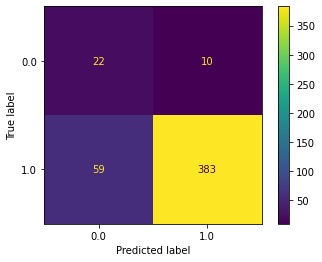

In [254]:
dt.fit(x_train_lda, y4_train)
dt_y_pred = dt.predict(x_test_lda)
print(plot_confusion_matrix(dt, x_test_lda, y4_test))

In [255]:
print(classification_report(y4_test, dt_y_pred))

              precision    recall  f1-score   support

         0.0       0.27      0.69      0.39        32
         1.0       0.97      0.87      0.92       442

    accuracy                           0.85       474
   macro avg       0.62      0.78      0.65       474
weighted avg       0.93      0.85      0.88       474



### Run the Naive Bays Guassian Classfier 

In [256]:
from sklearn.naive_bayes import GaussianNB

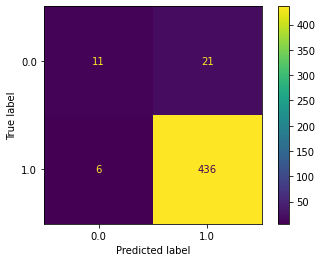

In [258]:
nb = GaussianNB()
nb.fit(x_train_lda, y4_train)
nb_y_pred = nb.predict(x_test_lda)
print(plot_confusion_matrix(nb, x_test_lda, y4_test))

In [259]:
print(classification_report(y4_test, nb_y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.34      0.45        32
         1.0       0.95      0.99      0.97       442

    accuracy                           0.94       474
   macro avg       0.80      0.67      0.71       474
weighted avg       0.93      0.94      0.93       474



### Run SVC

In [260]:
from sklearn.svm import SVC

In [269]:
svc = SVC()

In [270]:
svc_param_dict = { 'C':[0.1,1,10,100],
                 'gamma': [1,0.1,0.01],
                 'kernel': ['linear', 'rbf', 'poly'],
                 'class_weight' : [{0:100, 1:1},{0:10, 1:1}, {0:5, 1:1}] }
svc_gscv = GridSearchCV(svc, param_grid=svc_param_dict, cv = 5, verbose=3, n_jobs=-1)
svc_gscv.fit(x_train_lda, y4_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
                                          {0: 5, 1: 1}],
                         'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [271]:
svc_gscv.best_params_

{'C': 0.1, 'class_weight': {0: 5, 1: 1}, 'gamma': 0.01, 'kernel': 'rbf'}

In [281]:
svc.set_params(C= 1, gamma= 1, kernel= 'rbf', class_weight= {0: 5, 1: 1})

SVC(C=1, class_weight={0: 5, 1: 1}, gamma=1)

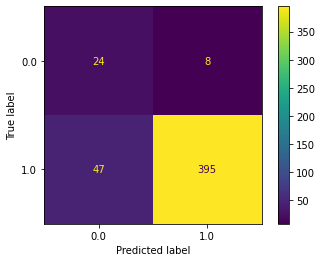

In [282]:
svc.fit(x_train_lda, y4_train)
svc_y_pred = svc.predict(x_test_lda)
print(plot_confusion_matrix(svc, x_test_lda, y4_test))

In [283]:
print(classification_report(y4_test, svc_y_pred))

              precision    recall  f1-score   support

         0.0       0.34      0.75      0.47        32
         1.0       0.98      0.89      0.93       442

    accuracy                           0.88       474
   macro avg       0.66      0.82      0.70       474
weighted avg       0.94      0.88      0.90       474



#### Classification reports as per different machine learning models

In [299]:
print('RANDOM FOREST CLASSIFIER', end = '\n\n')
print(classification_report(y4_test, rf_y_lda_pred))
print('**************'*4, end = '\n\n')

print('DECISION TREE CLASSIFIER', end = '\n\n')
print(classification_report(y4_test, dt_y_pred))
print('**************'*4, end = '\n\n')

print('NAIVE BAYES GUASSIAN CLASSIFIER', end = '\n\n')
print(classification_report(y4_test, nb_y_pred))
print('**************'*4, end = '\n\n')

print('SUPPORT VECTOR CLASSIFIER', end = '\n\n')
print(classification_report(y4_test, svc_y_pred))

RANDOM FOREST CLASSIFIER

              precision    recall  f1-score   support

         0.0       0.31      0.50      0.38        32
         1.0       0.96      0.92      0.94       442

    accuracy                           0.89       474
   macro avg       0.63      0.71      0.66       474
weighted avg       0.92      0.89      0.90       474

********************************************************

DECISION TREE CLASSIFIER

              precision    recall  f1-score   support

         0.0       0.27      0.69      0.39        32
         1.0       0.97      0.87      0.92       442

    accuracy                           0.85       474
   macro avg       0.62      0.78      0.65       474
weighted avg       0.93      0.85      0.88       474

********************************************************

NAIVE BAYES GUASSIAN CLASSIFIER

              precision    recall  f1-score   support

         0.0       0.65      0.34      0.45        32
         1.0       0.95      0.99   

## CONCLUSION:


#### 1. We have dropped 577 features to only 83 features, without impacting on the overall accuarcy
#### 2. Following approaches were used to drop the features:
        - Dropped the columns without any variance
        - Dropped the columns having the correlation coeffiecient greater than +0.9 and less than -0.9
        - Dropped the columns having variance inflation factor greater than 15
        - Dropped the columns using recursive feature ellimination technique
#### 3. We used LDA to transform the data for better sperability based on target variable
#### 4. Then different machine learning models were used on LDA transformed data. Overall aim of model was to improve recall. Below are the models tried:
        - Random forest classifier
        - Classificationa and regression tree (CART)
        - Naive Bayes model
        - Support Vector Classifier
#### 4. Finally, we recommend to proceed with Support Vector Classifier which provides higest recall of 75% with overall accuaracy of 88%